In [1]:
import pandas as pd


In [2]:
fish=pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target=fish['Species'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(fish_input,fish_target,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)

In [13]:


from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.7983193277310925
0.85


In [15]:
test_scaled

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [-0.60030873, -0.3089289 , -0.29269143, -0.43855288, -0.33056738],
       [-0.57779071, -0.36515506, -0.44035097, -0.52577528, -0.17219833],
       [ 2.41147684,  2.57734741,  2.4694106 ,  0.45038962,  1.54627043],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 1.70778862,  1.0779831 ,  1.06230202,  0.86222655,  1.2659243 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [-0.68475132, -0.7962223 , -0.7

In [16]:
print(kn.classes_)
print(kn.predict(test_scaled))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Roach' 'Pike' 'Bream' 'Perch'
 'Roach' 'Perch' 'Parkki' 'Perch']


In [17]:
import numpy as np
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


In [18]:
distances,indexes=kn.kneighbors(test_scaled[3:4])
print(y_train[indexes])

[['Roach' 'Perch' 'Perch' 'Perch' 'Perch']]


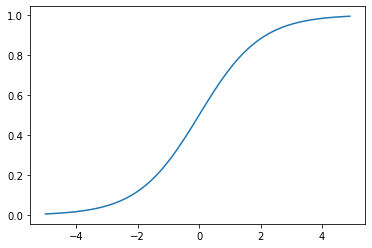

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))

plt.plot(z,phi)


In [24]:
char_arr=np.array(['a','b','c','d','e'])
print(char_arr[[True,False,True,False,False]])

['a' 'c']


In [34]:
#bream 혹은 smelt 인것만 뽑아서 불리안 형식으로 추출
#train data에 참값 즉, bream,smelt인것만 남는다
#y_train에 또한 bream,smelt 인것만 남는다

bream_smelt_indexes=(y_train=='Bream')|(y_train=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]

target_bream_smelt=y_train[bream_smelt_indexes]

In [ ]:
train_scaled

In [ ]:
y_test

In [ ]:
target_bream_smelt

In [36]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [37]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [39]:
#첫번째 열=음성(0), 두번째 열=양성(1)
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [41]:
lr.classes_

#음성= bream ,양성=smelt

array(['Bream', 'Smelt'], dtype=object)

In [42]:
train_bream_smelt.shape

(33, 5)

In [60]:
#가중치와 bias를 계산한 z값 
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[[ 13.07718535   5.67933183  -3.35337153  -3.31333393   2.17355979
  -20.94247833   6.67910682]
 [-11.87095602   2.30260525   5.3824912   -3.16151392   3.19010979
    8.30331541  -4.14605171]
 [ 12.33855718   5.65075319  -4.66936886  -2.14610952   1.70351724
  -17.38213321   4.50478398]
 [ 10.54146127   6.10965871  -4.81185145  -2.96228664   2.29023194
  -14.96395362   3.79673978]
 [ 13.67845346   5.73146189  -4.25487055  -2.55075462   1.73517048
  -20.24816955   5.90870889]]


In [ ]:
print(lr.coef_,lr.intercept_)
lr.intercept_.shape

In [ ]:
train_bream_smelt

In [48]:
#z값을 시그모이드 함수에 넣어서 구한 확률값 (0~1)
from scipy.special import expit
print(expit(decisions))     #predict_proba에서 2번째 값과 동일

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [54]:
#predict_proba는 음성과 양성 decision_function 은 양성클래스의 z값 출력
y_train.shape
train_scaled.shape
test_scaled.shape

(40, 5)

In [55]:
#로지스틱 회귀 이진분류 ▲
#------------------------------------------
#로지스틱 회귀 다중분류 ▼
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,y_train)

print(lr.score(train_scaled,y_train))

0.9327731092436975


In [56]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [57]:
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [58]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [63]:
decisions=lr.decision_function(test_scaled[:5])
print(np.round(decisions,decimals=5))

[[ -6.49807   1.03226   5.16358  -2.72866   3.33889   0.32648  -0.63448]
 [-10.85943   1.92726   4.7709   -2.39848   2.97816   7.84123  -4.25965]
 [ -4.33527  -6.23302   3.17445   6.48666   2.35754   2.42121  -3.87157]
 [ -0.68335   0.45272   2.64699  -1.18665   3.26451  -5.75273   1.25851]
 [ -6.39703  -1.99272   5.81571  -0.11036   3.50283  -0.11164  -0.7068 ]]


In [67]:
#2진분류는 expit 
#다중분류는 softmax
#결국 이 값은 predict_proba값과 일치
# z값 구하기-> 시그모이드 함수에 대입 == 확률

from scipy.special import softmax
proba=softmax(decisions,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
